<a href="https://colab.research.google.com/github/hasnaeb/crime_prediction_stlouiscity/blob/master/classification_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime prediction in St Louis City

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Importing, scaling and splitting the dataset.

In [0]:
# Loading and shuffling datasets
X = np.load('clean_attributes.npy')
y = np.load('clean_labels.npy')
# normalizing features
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# **Classification through KNN model**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

Choosing K-value

In [0]:
error_rate = []
for i in range(1,40):
    
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    pred_i = clf.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

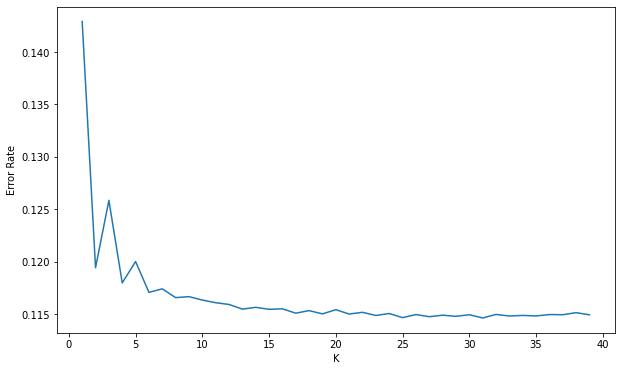

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.xlabel('K')
plt.ylabel('Error Rate')

In [15]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [16]:
clf.score(X_test,y_test)

0.2670935412026726

In [17]:
clf.score(X_train,y_train)


0.35836024498886415

# **Classification using Decision Trees**

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=100, random_state=300)

In [19]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=300, splitter='best')

In [20]:
clf.score(X_test,y_test)

0.4387305122494432

In [21]:
clf.score(X_train,y_train)

0.9748246102449889

# **Classification using RandomForest**

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
clf.score(X_test,y_test)

0.41332962138084633

In [24]:
clf.score(X_train,y_train)


0.9797021158129176

Since scores are low/overfitted , we broaden the categories to violent and non-violent crimes.

In [0]:
#cat 1 & 2 are violent crimes
y1 = y[:,0:2]
# cat 3 through 8 are non-violent
y2 = y[:,2:]

y1 = np.max(y1,axis=1)
y2 = np.max(y2,axis=1)
Y = np.array((y1,y2))
Y = Y.transpose()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# **KNN**

Choosing K-value

In [0]:
error_rate = []
for i in range(1,40):
    
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    pred_i = clf.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

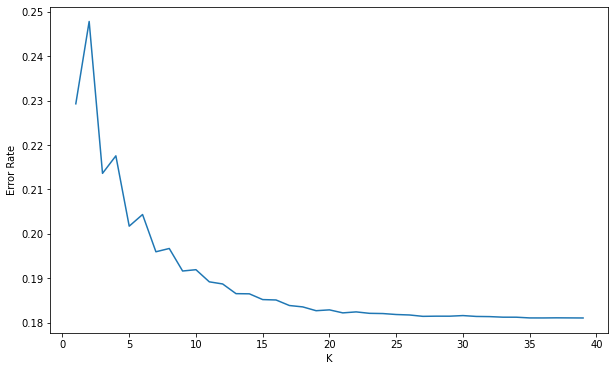

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [32]:
knn.score(X_test,y_test)

0.8134743875278396

In [33]:
knn.score(X_train,y_train)

0.8242344097995545

# **Decision Trees**

In [0]:
dtree = DecisionTreeClassifier(max_depth=100, random_state=300)

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=300, splitter='best')

In [37]:
dtree.score(X_test,y_test)

0.7624721603563475

In [36]:
dtree.score(X_train,y_train)

0.9895963251670379

# **Random Forest**

In [38]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
rfc.score(X_test,y_test)

0.86

In [40]:
rfc.score(X_train,y_train)


0.9941341870824053